# Classification des outliers

seance_projet_20190319_outliers

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import dump, load
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [2]:
#Les datasets train et test
df_train = pd.read_csv("df_train20190319.csv", index_col = 0) # indexé par card_id
df_test = pd.read_csv("df_test20190319.csv", index_col = 0) # indexé par card_id

In [3]:
for df in [df_train, df_test]:
    for col in ["last_purchase_hist", "last_purchase_new"]:
        df[col] = df[col].replace([0],["0000-00-00 00:00:00"])

In [4]:
for df in [df_train, df_test]:
    for col in ["last_purchase_hist", "last_purchase_new"]:
        df[col] = df[col].apply(lambda x: int(x[:4] + x[5:7] + x[8:10]))

In [5]:
df_train.head()

,feature_1,feature_2,feature_3,target,nb_purchases_hist,nb_purchases_new,purchase_amount_tot_hist,purchase_amount_tot_new,active_months,last_purchase_hist,last_purchase_new
card_id,,,,,,,,,,,
C_ID_92a2005557,5,2,1,-0.820283,260,23.0,-165.968739,-13.244202,8,20180225,20180429
C_ID_3d0044924f,4,1,0,0.392913,350,6.0,-210.006336,-4.355735,13,20180131,20180330
C_ID_d639edf6cd,2,2,0,0.688056,43,1.0,-29.167391,-0.700326,18,20180227,20180428
C_ID_186d6a6901,4,3,0,0.142495,77,7.0,-49.491364,-4.654372,5,20180228,20180418
C_ID_cdbd2c0db2,1,3,0,-0.159749,133,36.0,-48.687656,-19.926237,3,20180228,20180428


In [6]:
df_train["outliers_target"] = df_train["target"].apply(lambda x: 1 if (x < -30) else 0)

In [7]:
df_train.head()

,feature_1,feature_2,feature_3,target,nb_purchases_hist,nb_purchases_new,purchase_amount_tot_hist,purchase_amount_tot_new,active_months,last_purchase_hist,last_purchase_new,outliers_target
card_id,,,,,,,,,,,,
C_ID_92a2005557,5,2,1,-0.820283,260,23.0,-165.968739,-13.244202,8,20180225,20180429,0
C_ID_3d0044924f,4,1,0,0.392913,350,6.0,-210.006336,-4.355735,13,20180131,20180330,0
C_ID_d639edf6cd,2,2,0,0.688056,43,1.0,-29.167391,-0.700326,18,20180227,20180428,0
C_ID_186d6a6901,4,3,0,0.142495,77,7.0,-49.491364,-4.654372,5,20180228,20180418,0
C_ID_cdbd2c0db2,1,3,0,-0.159749,133,36.0,-48.687656,-19.926237,3,20180228,20180428,0


In [14]:
freq_outliers = df_train["outliers_target"].sum()/ df_train["outliers_target"].count()

print("Pourcentage d'outliers :", round(freq_outliers * 100,2), "%")

Pourcentage d'outliers : 1.09 %


### Classification des outliers avec un RandomForestClassifier

In [68]:
my_columns = df_train.drop(["target", "outliers_target"], axis = 1).columns

data = df_train[my_columns]
target = df_train.outliers_target

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)


In [69]:
clf = RandomForestClassifier(max_depth = 8, n_estimators = 12)

clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

pd.crosstab(y_test, pred_test, rownames = ["Classe réelle"], colnames = ["Classe prédite"])

Classe prédite,0
Classe réelle,
0,39934
1,450


Sans surprise, aucun outlier n'est détecté.

En changeant le seuil de probabilité :

Classe prédite      0    1
Classe réelle             
0               39619  315
1                 399   51
0.9999960072189481 3.99278105185824e-06


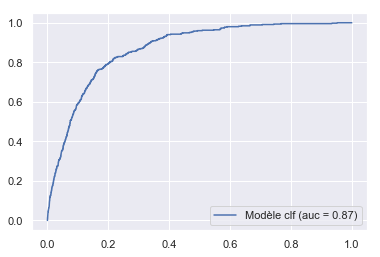

In [81]:
probs = clf.predict_proba(X_test)
y_preds = np.where(probs[:,1] > 0.1, 1, 0)

print(pd.crosstab(y_test, y_preds, rownames = ["Classe réelle"], colnames = ["Classe prédite"]))

print(probs.max(), probs.min())

fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label = 1 )
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = "Modèle clf (auc = %0.2f)" %roc_auc);
plt.legend();


Le classificateur n'est pas suffisamment bon.

### Avec sous-échantillonnage / undersampling

In [93]:
pos_events = df_train[df_train["outliers_target"] == 1]
neg_events = df_train[df_train["outliers_target"] == 0]

pos_events = pos_events.reindex(np.random.permutation(pos_events.index))
undersampled_data = pd.concat([neg_events.head(len(pos_events)), pos_events])

In [94]:
my_columns = df_train.drop(["target", "outliers_target"], axis = 1).columns

data = undersampled_data[my_columns]

target = undersampled_data.outliers_target

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 555)

In [96]:
dtc_u = DecisionTreeClassifier(max_depth = 5)

ac = AdaBoostClassifier(base_estimator = dtc_u, learning_rate = 0.1, n_estimators = 100)
ac.fit(X_train, y_train)
pred_train = ac.predict(X_train)
y_pred = ac.predict(X_test)

pd.crosstab(y_test, y_pred, rownames = ["Classe réelle"], colnames = ["Classe prédite"])

Classe prédite,0,1
Classe réelle,,
0,411,132
1,142,419


Classe prédite    0    1
Classe réelle           
0               411  132
1               142  419
0.9999438671884315 5.613281156846192e-05


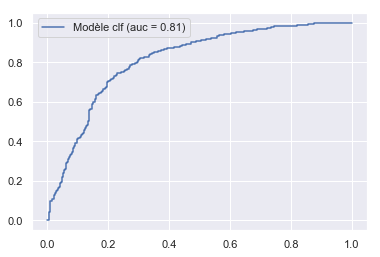

In [104]:
probs = ac.predict_proba(X_test)
y_preds = np.where(probs[:,1] > 0.5, 1, 0)

print(pd.crosstab(y_test, y_preds, rownames = ["Classe réelle"], colnames = ["Classe prédite"]))

print(probs.max(), probs.min())


fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label = 1 )
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = "Modèle clf (auc = %0.2f)" %roc_auc);
plt.legend();

### Avec sur-échantillonnage / oversampling (SMOTE)

In [82]:
my_columns = df_train.drop(["target", "outliers_target"], axis = 1).columns

data = df_train[my_columns]
target = df_train.outliers_target

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 42)

sm = SMOTE()
data_res, target_res = sm.fit_sample(X_train, y_train)

In [83]:
clf = GradientBoostingClassifier(max_depth = 8, n_estimators = 12, learning_rate = 0.01, min_samples_leaf = 1, random_state = 42)

clf.fit(data_res, target_res)
y_pred = clf.predict(X_test)

pd.crosstab(y_test, y_pred, rownames = ["Classe réelle"], colnames = ["Classe prédite"])

Classe prédite,0,1
Classe réelle,,
0,43172,6756
1,236,316


Classe prédite      0     1
Classe réelle              
0               46514  3414
1                 352   200


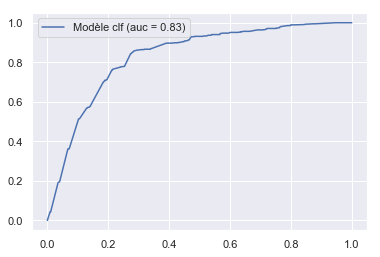

In [92]:
probs = clf.predict_proba(X_test)
y_preds = np.where(probs[:,1] > 0.51, 1, 0)

print(pd.crosstab(y_test, y_preds, rownames = ["Classe réelle"], colnames = ["Classe prédite"]))


fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label = 1 )
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = "Modèle clf (auc = %0.2f)" %roc_auc);
plt.legend();